## **09. Representasi Pengetahuan (Knowledge Representation)**

---


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_testing = pd.read_csv('../../08. Evaluasi Pola (Pattern Evaluation)/Hasil/hasil_prediksi-diet(cnn).csv')

In [3]:
#eda dari data_testing jumlah kosa kata dan kata terpanjang pada full_text
print(data_testing['full_text'].str.split().apply(len).describe())



count    6201.000000
mean       16.397033
std        12.765898
min         1.000000
25%         7.000000
50%        12.000000
75%        22.000000
max        62.000000
Name: full_text, dtype: float64


In [4]:
#tampilkan atribut yang ada di data
data_testing.columns

Index(['username', 'full_text', 'topic', 'topic_probability',
       'predicted_label', 'probability_emotion'],
      dtype='object')

In [5]:
#ubah nama atribut topic_cluster menjadi topic
data_testing.rename(columns={'topic_cluster':'topic'}, inplace=True)

#tambahkan atribut probability = 0
data_testing['probability'] = 0

#tambahkan atribut konteks dengan 0
data_testing['context'] = 0


In [6]:
#tampilkan hanya kolom full_text, topic_cluster, emotion dan username
merged_df = data_testing[['username','full_text','topic', 'predicted_label']]

merged_df.head(10)

,username,full_text,topic,predicted_label
0,Fifayna,@XXXbyefelicia lol baru je tegur org comment p...,3,Anger
1,nastyyyycat,Untuk saat ini bukannya gak mau diet tapi lagi...,0,Anger
2,arressssssssss,@nawwme Kenapa banyak yg pengen diet dah,0,Joy
3,leelyylee,Rekom menu buat diet makasii kakanya udah nge-...,1,Joy
4,woyfit,@rimafebrr Kak kan dietnya udah ada perubahan ...,0,Joy
5,ngacmuk,melihat tips diet... hmzz masih oke untuk dius...,3,Neutral
6,kvpall,rutsuki adalah cewek2 ketika disuruh diet http...,4,Anger
7,nhr_shinosuke,@peachtobeli Untukk Baekhyun semogaaa apa yg s...,0,Joy
8,ziqanimnim,Ye betul siap ckp diet la kurang kn la mkn itu...,4,Sad
9,jrdsty,@dhharu8610 @Adliinnn27 @sugakasep @taqdirkun ...,0,Anger


In [7]:
#count emotion
emotion_count = merged_df['predicted_label'].value_counts()
emotion_count

predicted_label
Joy        3127
Anger      1854
Neutral     656
Sad         305
Love        178
Fear         81
Name: count, dtype: int64

In [8]:
#bisa melihat tiap topik yang paling banyak labelnya apa?
topic_emotion_count = merged_df.groupby(['topic','predicted_label']).size().reset_index(name='count')
topic_emotion_count

,topic,predicted_label,count
0,0,Anger,443
1,0,Fear,26
2,0,Joy,718
3,0,Love,41
4,0,Neutral,176
5,0,Sad,80
6,1,Anger,263
7,1,Fear,8
8,1,Joy,548
9,1,Love,22


Text(0.5, 0, 'Emotion')

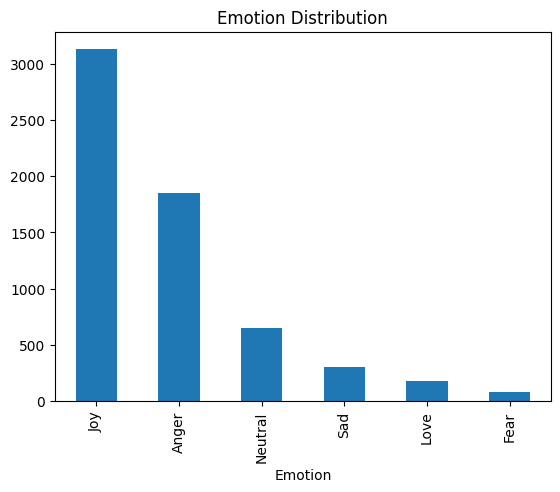

In [9]:
#visualisasikan value_counts dari emotion jadi graph
emotion_count.plot(kind='bar')
plt.title('Emotion Distribution')
plt.xlabel('Emotion')

In [10]:
jumlah_nan = merged_df.isna().sum()

print(jumlah_nan)

username           0
full_text          0
topic              0
predicted_label    0
dtype: int64


## Knowledge

### Per-Topic

In [11]:
topic_cluster_counts = merged_df['topic'].value_counts().reset_index()
topic_cluster_counts

,topic,count
0,0,1484
1,3,1259
2,2,1254
3,4,1230
4,1,974


<Axes: xlabel='predicted_label', ylabel='count'>

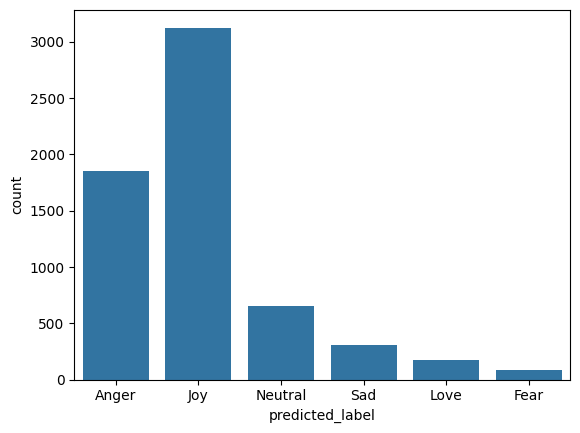

In [12]:
#tampilkan semua data tanpa melihat topic
sns.countplot(x='predicted_label', data=merged_df)

In [13]:
topik_ke = 0

topic_cluster_0_df = merged_df[merged_df['topic'] == topik_ke]
topic_cluster_0_df = topic_cluster_0_df.sort_values(by='predicted_label', ascending=True)

count_emotion = topic_cluster_0_df['predicted_label'].value_counts().reset_index()
count_emotion

,predicted_label,count
0,Joy,718
1,Anger,443
2,Neutral,176
3,Sad,80
4,Love,41
5,Fear,26


<Axes: xlabel='predicted_label', ylabel='count'>

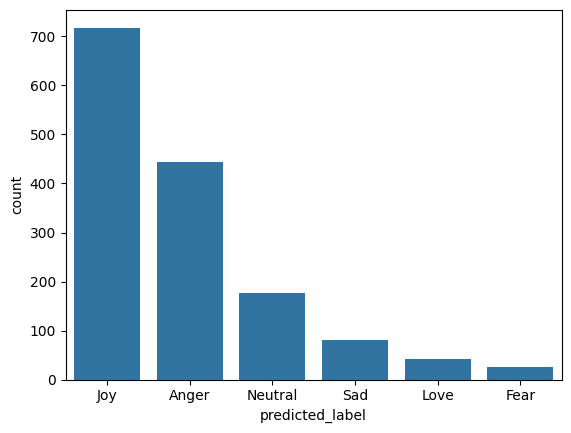

In [14]:
sns.barplot(x='predicted_label', y='count', data=count_emotion)


In [15]:
topic_cluster_0_df = topic_cluster_0_df.sort_values(by='predicted_label', ascending=False)


#tampilkan semuanya di output jangan dibatasi
pd.set_option('display.max_rows', None)
topic_cluster_0_df.head(10)


,username,full_text,topic,predicted_label
4291,pmrsman1pati,Namun hal ini perlu dibarengi dengan pola maka...,0,Sad
3107,risensiren,gue pengen sushian sekali pigging out aja gitu...,0,Sad
2632,matchaaacii,cape² diet trnyta yg bkin bb turun adl sakit,0,Sad
4927,iiimarkleeuy_,@cuniepoetic tpi kmu klo mau diet jgn ketat ba...,0,Sad
1286,yourkindy,@yyaooong Eh ya Allah kamu kok bisaaa harus ra...,0,Sad
706,pxncake,@peachyxxbby Aku kebiasaan makan tengah malam ...,0,Sad
5068,mysun_flo,@miyanoslut @diethingy Kak Mjb mau tanya kalau...,0,Sad
1413,Meragold1,YG please jgn suruh anak2 BM diet udah gini aj...,0,Sad
2967,Ependi54583138,@Nikenanjani112 Jangan diet...,0,Sad
5227,nattauror,@diethingy Nder kita sama banget. Aku juga gym...,0,Sad


In [16]:
#ukuran kolom jangan dibatasi untuk full_text
pd.set_option('display.max_colwidth', None)

#tampilkan hanya emosi anger
topic_cluster_0_df[topic_cluster_0_df['predicted_label'] == 'Joy'].head(10)

,username,full_text,topic,predicted_label
1882,diethingy,Diet! Akhirnya setelah 3 bulan dari 67 kg bisa turun ke angka 50-an. Bulan ini cuma turun BB 1 kg dari 59 kg ke 58 kg. Tp harus tetap menuju BB ideal,0,Joy
1905,diethingy,diet! Sender baru mau mulai diet dan wo ada yg sama ga? Atau mungkin yg lagi jalanin diet yuk mutualan biar sender jadiin motivasi,0,Joy
1903,Benzeuma,pengen diet ucapku sambil ngemil kue bawang,0,Joy
1885,amourccia,@rabiexs lagi diet kah?,0,Joy
956,orenjiaji,@eightyeightbae Tergantung kebutuhan juga kak... aku lemak masih agak kuat gula dan garam kurangin berat badanku turun 9kg dalam 2 bulan tanpa diet dan olahraga berat,0,Joy
1869,ayobacanews,Diet Sehat Tips Turunkan Berat Badan dengan Mudah tanpa Stres https://t.co/NufiQiZLpA,0,Joy
1023,jjanggsu,KAKKKKK gue mau curhat gue diet trus malah kena aslam gmn dong,0,Joy
1876,nhakhzhd_,Lama betoi journey diet kalini. 4 bulan baru turun 4kg aku dah barannnnnn,0,Joy
1861,lipundaKE,@ONDITI_1 @RodgersKipembe Ni kama diet haikosangi acid,0,Joy
1860,jalapenasss,pen buat matcha lava cake tp lg clean food diet,0,Joy


# Konten Tentang Timnas Indonesia di Vidio

## 1. Dukungan Penggemar untuk Timnas Indonesia (Joy)
**Konten Senang**: Video yang menyoroti dukungan penuh dari para penggemar untuk Timnas Indonesia, termasuk ucapan selamat dan sorak-sorai setelah kemenangan dalam berbagai pertandingan.

**Contoh Tweet**:
> Dukungan luar biasa dari penggemar untuk Timnas Indonesia! 🎉 Saksikan momen-momen kegembiraan dan ucapan selamat untuk para pemain. #DukungTimnas [link video]

## 2. Perjalanan Timnas Indonesia di Babak Kualifikasi Piala Dunia dan Piala Asia (Joy)
**Konten Senang**: Video rekapitulasi perjalanan Timnas Indonesia di babak kualifikasi, termasuk momen-momen penting dan wawancara dengan pemain serta pelatih.

**Contoh Tweet**:
> Timnas Indonesia tampil impresif di kualifikasi Piala Dunia dan Piala Asia! 🎉 Saksikan rekap perjalanan mereka dan wawancara eksklusif. #TimnasKualifikasi [link video]

## 3. Keberhasilan Timnas Indonesia Lolos ke Putaran Ketiga Kualifikasi Piala Dunia 2026 (Joy)
**Konten Senang**: Cuplikan video dari momen-momen gol dan selebrasi pemain serta fans. Kutipan inspiratif dari pelatih dan pemain tentang perjalanan mereka menuju kualifikasi.

**Contoh Tweet**:
> Timnas Indonesia lolos ke putaran ketiga kualifikasi Piala Dunia 2026! 🎊 Saksikan momen-momen terbaik dan kegembiraan para pemain dan fans! #TimnasLolos [link video]

## 4. Penampilan Anang Menyanyikan "Indonesia Pusaka" Sebelum Pertandingan (Anger)
**Konten Marah**: Video atau artikel yang membahas reaksi emosional penggemar terhadap penampilan Anang menyanyikan "Indonesia Pusaka" sebelum pertandingan, dengan fokus pada kontroversi dan pendapat yang beragam.

**Contoh Tweet**:
> Penampilan Anang menyanyikan "Indonesia Pusaka" sebelum pertandingan menimbulkan berbagai reaksi. Apa pendapat kalian? #IndonesiaPusaka [link video]

## 5. Performa Thom Haye dan Verdonk di lapangan saat bersama timnas(Love)
**Konten Cinta**: Video reaksi penggemar yang menunjukkan dukungan dan kasih sayang mereka kepada pemain seperti Verdonk dan Haye. Testimoni dari fans tentang kecintaan mereka pada pemain dan tim.

**Contoh Tweet**:
> Dukungan luar biasa dari penggemar untuk Verdonk dan Haye! ❤️ Saksikan reaksi dan testimoni mereka tentang kecintaan pada Timnas Indonesia. #LoveForTimnas [link video]

## 6. Momen Bersejarah dan Gol Penting Timnas Indonesia (Joy)
**Konten Senang**: Cuplikan video dari momen-momen bersejarah dan gol-gol penting yang dicetak oleh Timnas Indonesia dalam babak kualifikasi dan turnamen AFF.

**Contoh Tweet**:
> Gol-gol bersejarah dari Timnas Indonesia di babak kualifikasi dan turnamen AFF! 🎊 Saksikan momen-momen terbaik di sini. #TimnasGol [link video]

## 7. Kondisi Rumput di Stadion Gelora Bung Karno Setelah Konser (Fear)
**Konten Takut**: Video yang menunjukkan kondisi rumput di Stadion Gelora Bung Karno setelah konser, dengan sorotan pada keluhan penggemar mengenai dampaknya pada performa timnas Indonesia di lapangan.

**Contoh Tweet**:
> Lihat kondisi rumput Stadion Gelora Bung Karno setelah konser dan bagaimana ini memengaruhi performa timnas Indonesia. #GBKRumput [link video]

## 8. Diskusi Strategi Pelatih Shin Tae-yong dan Potensi Pemain Diaspora (Joy)
**Konten Senang**: Video yang menyoroti strategi pelatih Shin Tae-yong dan performa pemain seperti Ernando dan Verdonk, termasuk diskusi tentang potensi pemain diaspora untuk memperkuat timnas.

**Contoh Tweet**:
> Lihat bagaimana strategi Shin Tae-yong membawa Timnas Indonesia ke puncak! 🎉 Diskusi tentang pemain diaspora dan potensi mereka di sini. 💪🇮🇩 [link video]

## 9. Kondisi Lapangan dan Performa Pemain di Berbagai Pertandingan (Fear)
**Konten Takut**: Video yang menunjukkan kondisi lapangan yang kurang baik dan dampaknya pada performa pemain Timnas Indonesia di berbagai pertandingan.

**Contoh Tweet**:
> Kondisi lapangan yang kurang baik memengaruhi performa pemain Timnas Indonesia. Lihat bagaimana ini berdampak pada pertandingan. #KondisiLapangan [link video]

## 10. Pengalaman Penggemar Menonton Pertandingan Timnas Indonesia (Fear)
**Konten Takut**: Video yang menunjukkan pengalaman penggemar saat menonton pertandingan timnas, dengan fokus pada momen-momen penting dan rasa takut akan ketinggalan (FOMO).

**Contoh Tweet**:
> Banyak yang merasa FOMO karena tidak bisa menonton langsung Timnas. 😢 Simak cerita mereka dan dukung Timnas dari rumah! #FOMOTimnas [link video]